In [3]:
import os
import sys
import json
from tqdm import tqdm_notebook as tqdm
from pprint import pprint

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

## data load

In [2]:
ls ../mnt/inputs/origin/

data-science-bowl-2019.zip  specs.csv  train.csv     train_labels.csv
sample_submission.csv       test.csv   train.pkl.gz


In [5]:
trn_df = pd.read_pickle('../mnt/inputs/origin/train.pkl.gz')
# trn_df = pd.read_csv('../mnt/inputs/origin/train.csv')
trn_labels_df = pd.read_csv('../mnt/inputs/origin/train_labels.csv')
specs_df = pd.read_csv('../mnt/inputs/origin/specs.csv')
tst_df = pd.read_csv('../mnt/inputs/origin/test.csv')
sub_df = pd.read_csv('../mnt/inputs/origin/sample_submission.csv')

In [4]:
display(trn_df.shape, trn_df.head())

(11341042, 11)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [10]:
display(trn_labels_df.shape, trn_labels_df.head())

(17690, 7)

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [6]:
display(tst_df.shape, tst_df.head())

(1156414, 11)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [7]:
display(sub_df.shape, sub_df.head())

(1000, 2)

,installation_id,accuracy_group
0,00abaee7,3
1,01242218,3
2,017c5718,3
3,01a44906,3
4,01bc6cb6,3


In [8]:
# 重いので train のみ pkl 化
# trn_df.to_pickle('../mnt/inputs/origin/train.pkl.gz', compression='gzip')

## EDA

In [11]:
trn_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [25]:
trn_df.type.value_counts()

Game          5795293
Activity      4436728
Assessment     925345
Clip           183676
Name: type, dtype: int64

In [ ]:
trn_df.query('type == "Assessment"').head().event_data.iloc[0]

#### num_correct, num_incorrect について見てみる

In [6]:
trn_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [7]:
trn_labels_df.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [ ]:
trn_df.installation_id.nunique()

## define util funcs

In [1]:
from functools import partial
from joblib import Parallel, delayed

class featureGenerator():
    def __init__(self, nthreads=1):
        self.nthreads = nthreads

    def _apply_func_over_grp_df(self, grp_df, func):
        res = Parallel(n_jobs=self.nthreads, verbose=5)(delayed(func)(group) for _, grp_df in grp_df)
        return pd.concat(res, axis=0)

    def gen_lag_features(self, df, feature_func, **kwargs):
        iter_func = partial(feature_func, **kwargs)
        features_df = self._apply_func_over_grp_df(grp_df, iter_func)
        return features_df

## features

In [30]:
tst_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [46]:
trn_df.shape

(11341042, 11)

In [44]:
tst_df.event_data.apply(lambda x: json.loads(x)['event_code'])

0          2000
1          2000
2          2000
3          2000
4          2000
           ... 
1156409    3121
1156410    2030
1156411    2010
1156412    2000
1156413    2000
Name: event_data, Length: 1156414, dtype: int64

In [31]:
import matplotlib_venn

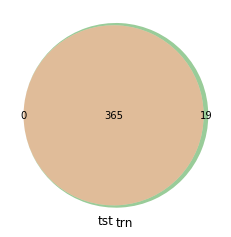

In [33]:
matplotlib_venn.venn2([set(tst_df.event_id), set(trn_df.event_id)], set_labels=['tst', 'trn'])

In [42]:
df = pd.crosstab(
    # [tst_df.event_id, tst_df.event_code],
    [tst_df.event_id, ],
    [tst_df.event_code],
    margins=True
)
display(df)
df = df.reset_index()

event_code,2000,2010,2020,2025,2030,2035,2040,2050,2060,2070,...,4090,4095,4100,4110,4220,4230,4235,5000,5010,All
event_id,,,,,,,,,,,,,,,,,,,,,
0086365d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,326
00c73085,0,0,0,0,1292,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1292
022b4259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3122
02a42007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12293
0330ab6a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f93fc684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,870
fbaf3456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2304
fcfdffb6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6834


In [40]:
df.head()

event_code,event_id,2000,2010,2020,2025,2030,2035,2040,2050,2060,...,4090,4095,4100,4110,4220,4230,4235,5000,5010,All
0,0086365d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,326
1,00c73085,0,0,0,0,1292,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1292
2,022b4259,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3122
3,02a42007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12293
4,0330ab6a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12246
